In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('space_server.csv')
df.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


    Our target variable is 'class' which consists of three categories i.e. star, galaxy, and quasar.

In [3]:
df.shape

(10000, 18)

In [4]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

    No null values present in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


    -'objid' and 'rerun' consist of only one unique value
    -large difference between 75th percentile and maximum value of [ra, r, i, z, run, field, specobjid, reshift, plate, 
     fibergrid] shows that maybe outliers present in them.

In [7]:
df['rerun'].unique()

array([301], dtype=int64)

In [8]:
df['objid'].unique()

array([1.23765e+18])

In [9]:
#Dropping 'objid' and 'rerun'
df=df.drop(['rerun','objid'],axis=1)

In [11]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

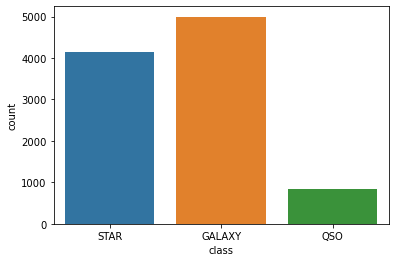

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [13]:
plt.subplots(figsize=(6,4))
sn.countplot(x='class',data=df)
plt.show()

print(df['class'].value_counts())

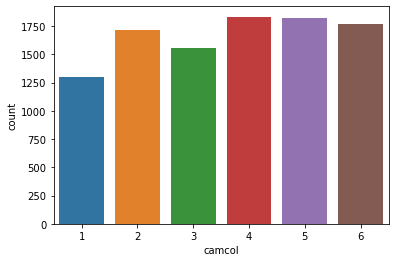

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [14]:
plt.subplots(figsize=(6,4))
sn.countplot(x='camcol',data=df)
plt.show()

print(df['camcol'].value_counts())

In [16]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         10000 non-null  float64
 1   dec        10000 non-null  float64
 2   u          10000 non-null  float64
 3   g          10000 non-null  float64
 4   r          10000 non-null  float64
 5   i          10000 non-null  float64
 6   z          10000 non-null  float64
 7   run        10000 non-null  int64  
 8   camcol     10000 non-null  int64  
 9   field      10000 non-null  int64  
 10  specobjid  10000 non-null  float64
 11  class      10000 non-null  int32  
 12  redshift   10000 non-null  float64
 13  plate      10000 non-null  int64  
 14  mjd        10000 non-null  int64  
 15  fiberid    10000 non-null  int64  
dtypes: float64(9), int32(1), int64(6)
memory usage: 1.2 MB


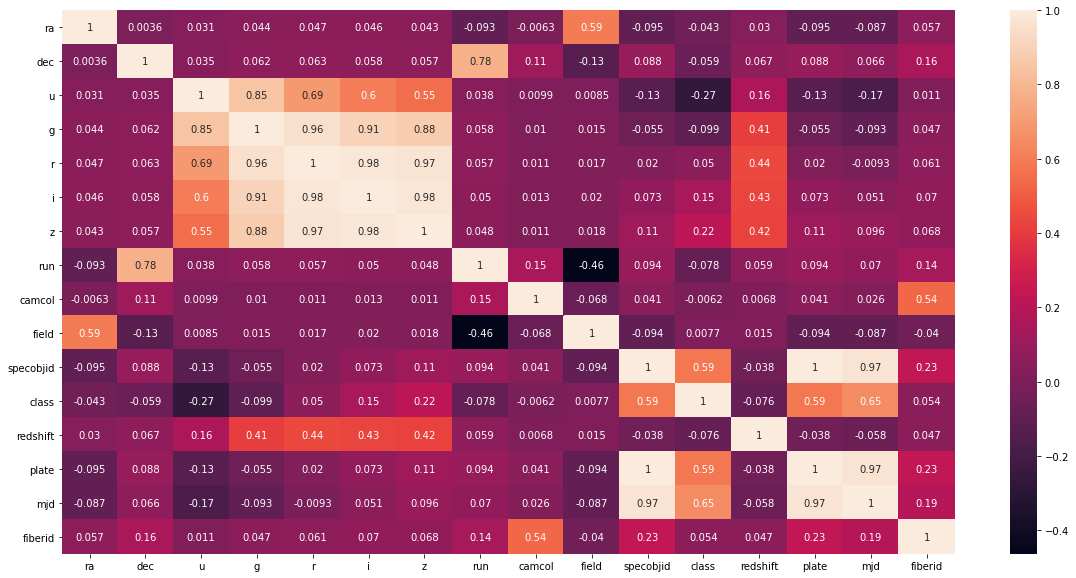

In [18]:
#Checking correlation
corr=df.corr()
plt.figure(figsize=(20,10))
sn.heatmap(corr,annot=True)

    -'specobjid', 'plate', and 'mjd' has high positive correlation with target variable.
    -'u' has a moderate negative correlation and 'camcol', 'field' have very low correlation with target variable

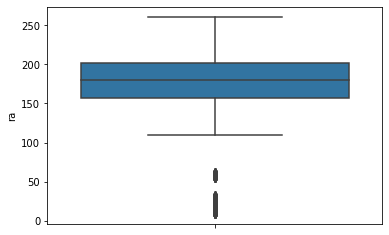

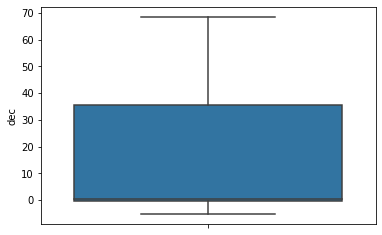

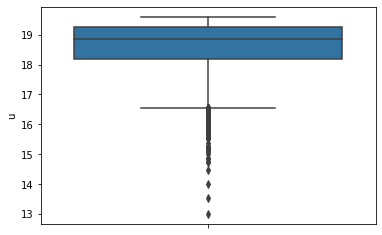

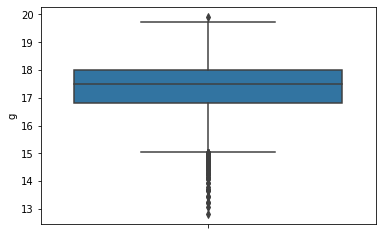

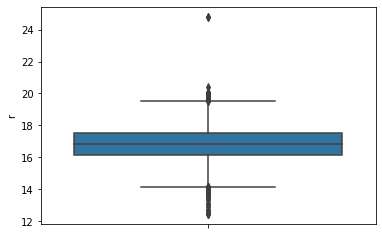

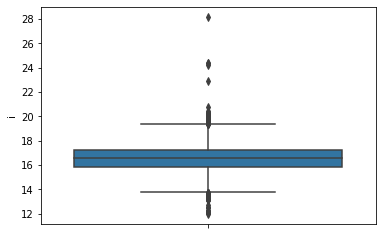

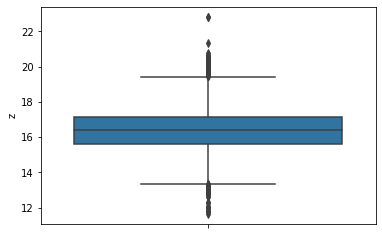

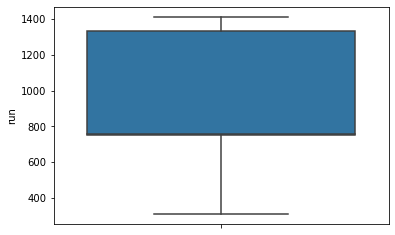

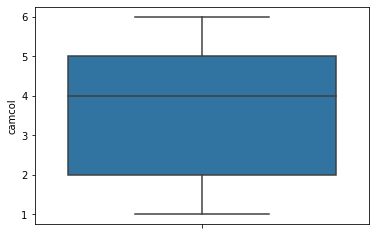

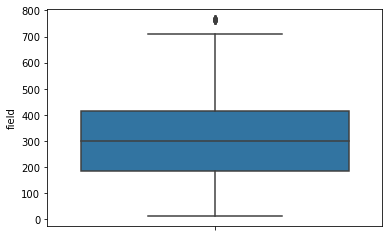

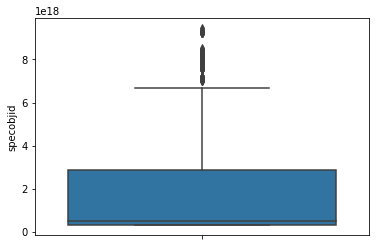

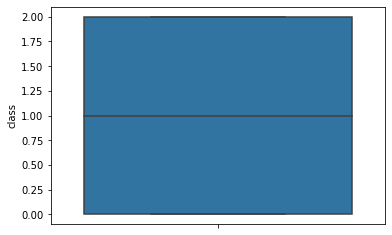

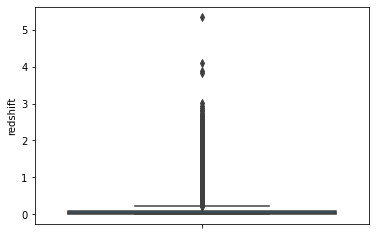

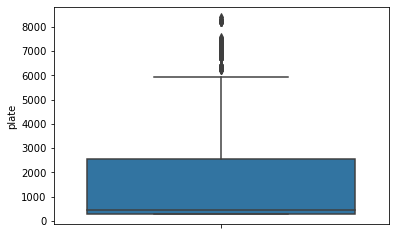

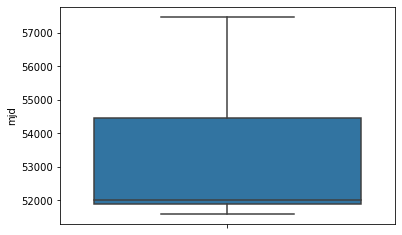

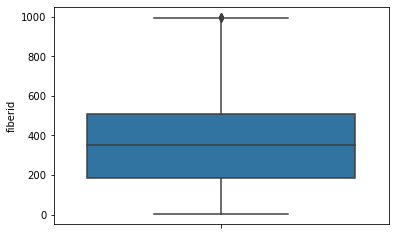

In [21]:
for col in df.describe().columns:
    sn.boxplot(df[col],orient='v')
    plt.show()

In [22]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [23]:
df=df.drop(['redshift'],axis=1)

In [24]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
df1.shape, df.shape

((9059, 15), (10000, 15))

In [25]:
df1.skew()

ra          -0.136484
dec          1.197964
u           -1.012908
g           -0.413725
r           -0.024636
i            0.132133
z            0.216474
run          0.508860
camcol      -0.145232
field        0.216117
specobjid    1.391429
class        0.279572
plate        1.391413
mjd          0.990843
fiberid      0.085238
dtype: float64

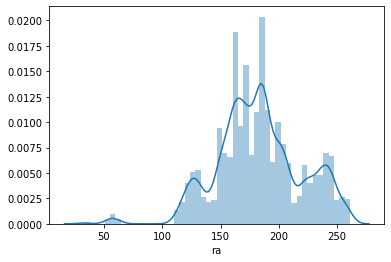

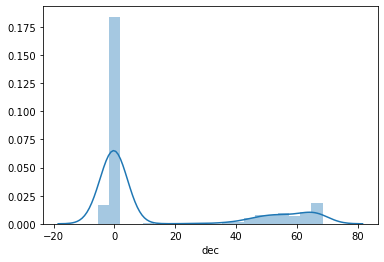

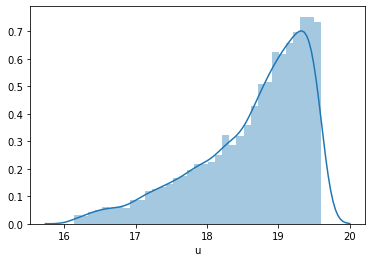

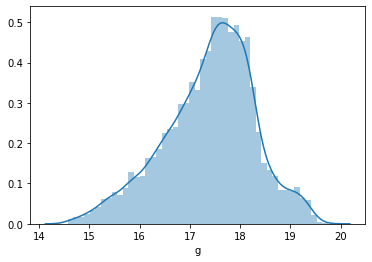

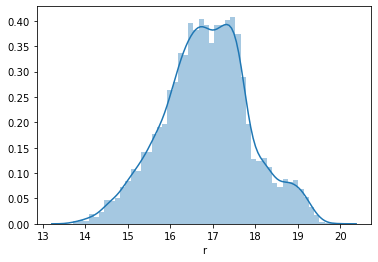

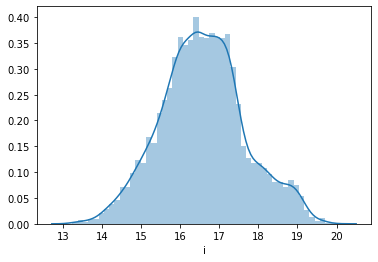

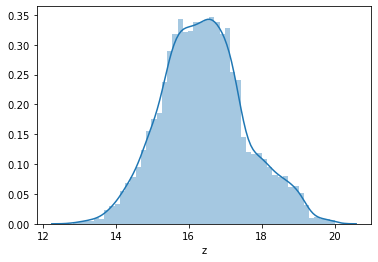

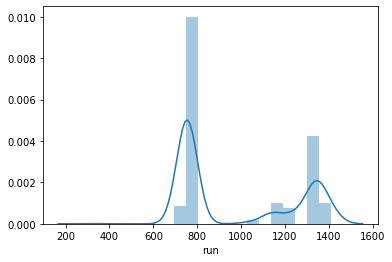

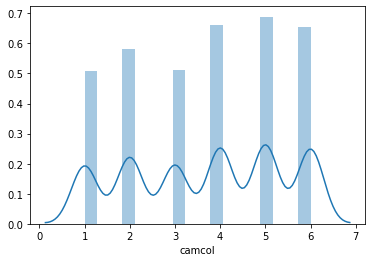

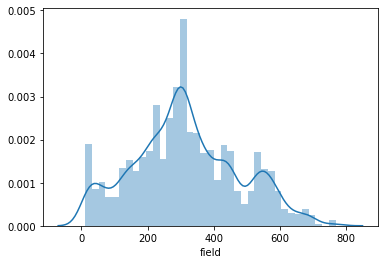

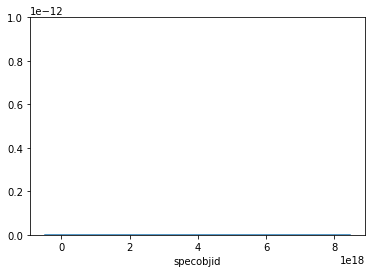

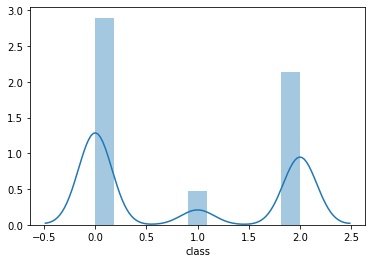

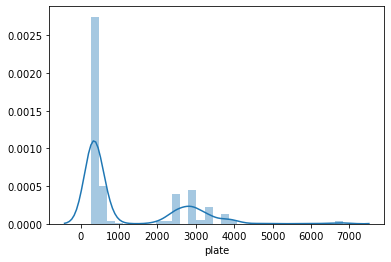

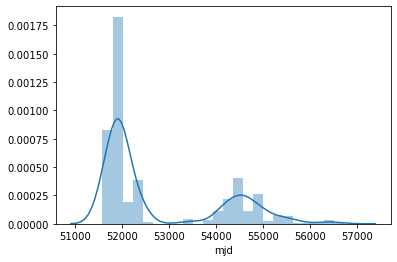

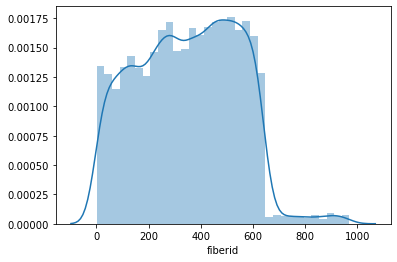

In [28]:
for col in df1.describe().columns:
    sn.distplot(df1[col])
    plt.show()

In [26]:
x=df1.drop(['class'],axis=1)
y=df1['class']

In [27]:
#Removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [29]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx=sc.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [31]:
best_rstate=0
accu=0
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=i)
    svc=SVC()
    svc.fit(train_x,train_y)
    pred=svc.predict(test_x)
    temp_acc=accuracy_score(test_y,pred)
    if temp_acc>accu:
        accu=temp_acc
        best_rstate=i

print(f'Best accuracy {accu*100} found on random_state {best_rstate}')

Best accuracy 93.59823399558499 found on random_state 259


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.2,random_state=259)

models=[SVC(kernel='rbf'),SVC(kernel='linear'),SVC(kernel='poly'),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for v in models:
    v.fit(train_x,train_y)
    predv=v.predict(test_x)
    cvscore=cross_val_score(v,sx,y,cv=3)
    print(v)
    print(accuracy_score(test_y,predv))
    print('cv_score', cvscore.mean())
    print(confusion_matrix(test_y,predv))
    print(classification_report(test_y,predv))
    print('\n')

SVC()
0.9359823399558499
cv_score 0.904405468822549
[[919   7  31]
 [  8 133   6]
 [ 54  10 644]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       957
           1       0.89      0.90      0.90       147
           2       0.95      0.91      0.93       708

    accuracy                           0.94      1812
   macro avg       0.92      0.92      0.92      1812
weighted avg       0.94      0.94      0.94      1812



SVC(kernel='linear')
0.9564017660044151
cv_score 0.9509883321743745
[[917   6  34]
 [  7 131   9]
 [ 17   6 685]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       957
           1       0.92      0.89      0.90       147
           2       0.94      0.97      0.95       708

    accuracy                           0.96      1812
   macro avg       0.94      0.94      0.94      1812
weighted avg       0.96      0.96      0.96      1812



SVC(kernel='poly')
0.9

In [33]:
#Hypertuning
parameter={'kernel':['linear'],'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.01,0.1,1],}

In [34]:
gcv=GridSearchCV(SVC(),parameter,cv=3,refit=True)
gcv.fit(train_x,train_y)
gcv.best_estimator_
gcv_pred=gcv.best_estimator_.predict(test_x)
print('accuracy_score', accuracy_score(test_y,gcv_pred))

accuracy_score 0.9597130242825607


In [35]:
import pickle
file='space_server.pkl'
pickle.dump(gcv,open(file,'wb'))